In [11]:
FUENTES_DIR = '../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
DATOS_DIR   = '../Data_Sets/p2/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pylab as plt
from IPython import display
from ClassPerceptron import Perceptron
from sklearn import preprocessing
import grafica as gr
from ClassNeuronaLineal import NeuronaLineal

## Ejercicio 5

A partir de los ejemplos del archivo **automobile-simple.csv**, utilizado en la práctica anterior, se entrenará un combinador lineal para predecir el precio del auto (atributo *price*) en función del tamaño del motor (atributo *engine-size*):

### a) 

Antes de comenzar con el entrenamiento, complete los datos faltantes del atributo *price* utilizando el valor promedio.



In [12]:
data_autos = pd.read_csv(DATOS_DIR + "automobile-simple.csv", sep=",")
data_autos.dtypes
print(data_autos.columns.tolist())

#Completo los datos faltantes del atributo 'price' con el valor promedio
data_autos['price'].fillna(data_autos['price'].mean(), inplace=True)

['make', 'fuel-type', 'num-of-doors', 'body-style', 'curb-weight', 'engine-size', 'horsepower', 'city-mpg', 'highway-mpg', 'price', 'volume', 'eco-rating']


/tmp/ipykernel_23473/2723663145.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_autos['price'].fillna(data_autos['price'].mean(), inplace=True)


### b) 

Luego de completar según lo indicado en a), realice el entrenamiento del combinador lineal:

**i.** Sin normalizar los atributos.  
**ii.** Normalizando ambos atributos linealmente.  
**iii.** Normalizando ambos atributos utilizando media y desvío.  



Analice el impacto de la normalización en el entrenamiento. ¿Qué resultados obtuvo sin normalizar los atributos? ¿Alguna de las normalizaciones es mejor? Explique.

/home/manuel/Documents/Facultad/DeepLearning/Practica3/../Fuentes/ClassNeuronaLineal.py:81: RuntimeWarning: overflow encountered in scalar power
  ErrorAct += errorXi**2
/home/manuel/Documents/Facultad/DeepLearning/Practica3/../Fuentes/ClassNeuronaLineal.py:94: RuntimeWarning: overflow encountered in dot
  return np.dot(X, self.w_) + self.b_
/home/manuel/Documents/Facultad/DeepLearning/Practica3/../Fuentes/ClassNeuronaLineal.py:78: RuntimeWarning: invalid value encountered in add
  self.w_ += update * xi
/home/manuel/Documents/Facultad/DeepLearning/Practica3/../Fuentes/ClassNeuronaLineal.py:79: RuntimeWarning: invalid value encountered in scalar add
  self.b_ += update


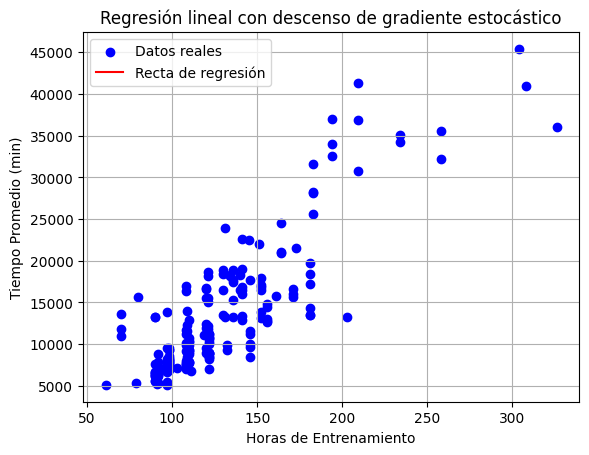

Los valores de w y b sin normalizar son: w= [nan] b= nan
Error cuadrático medio (sin normalizar):  nan


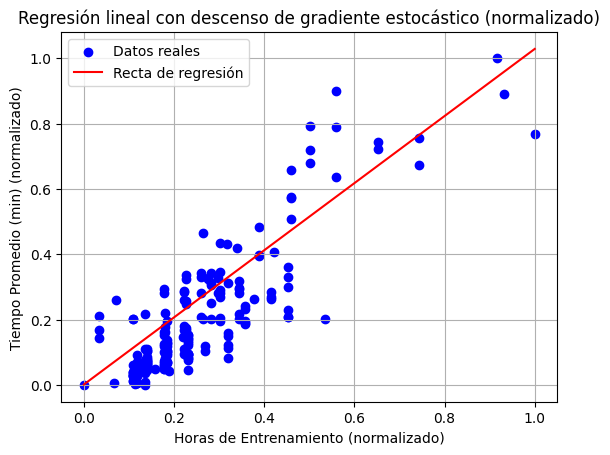

Los valores de w y b normalizados linealmente son: w= [1.02734953] b= 0.0012483142691080487
Error cuadrático medio (normalización normal):  232041318.9140517


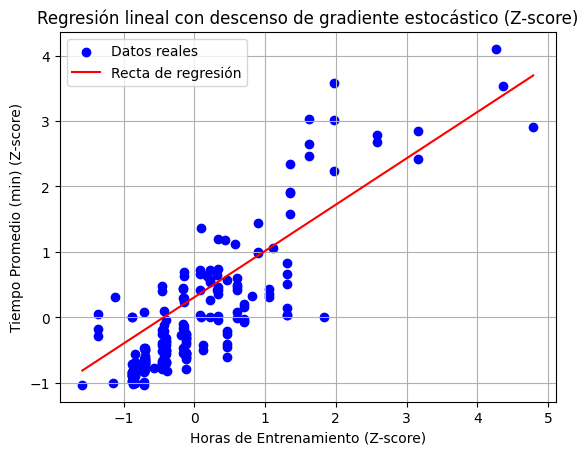

Los valores de w y b normalizados con Z-score son:  w= [0.70642451] b= 0.3102364461664081
El error cuadrático medio normalizado con Z-score es:  233279443.09876397


In [37]:
#Entrenamiento Combinador Lineal
ALPHA = 0.1
N_ITER = 1000
COTA_E = 1e-4

#Sin normalizar

X = data_autos[['engine-size']].values   # shape (n,1)
Y = data_autos['price'].values           # shape (n,)

modelo = NeuronaLineal(alpha=ALPHA, n_iter=N_ITER, cotaE=COTA_E, draw=0,
                       title=['Engine-size', 'Price'])
modelo.fit(X, Y)
plt.scatter(X, Y, color='blue', label='Datos reales')

x_range = np.linspace(min(X), max(X), 100)
y_pred = modelo.predict(x_range)

plt.plot(x_range, y_pred, color='red', label='Recta de regresión')
plt.xlabel("Horas de Entrenamiento")
plt.ylabel("Tiempo Promedio (min)")
plt.title("Regresión lineal con descenso de gradiente estocástico")
plt.legend()
plt.grid(True)
plt.show()

print("Los valores de w y b sin normalizar son:","w=", modelo.w_,"b=", modelo.b_)
print("Error cuadrático medio (sin normalizar): ", np.mean((Y - modelo.predict(X))**2))

#Normalizando Linealmente

X_norm = preprocessing.minmax_scale(X)   # shape (n,1)
Y_norm = preprocessing.minmax_scale(Y)           # shape (n,)
modelo_norm = NeuronaLineal(alpha=ALPHA, n_iter=N_ITER, cotaE=COTA_E, draw=0,
                       title=['Engine-size', 'Price'])
modelo_norm.fit(X_norm, Y_norm)
plt.scatter(X_norm, Y_norm, color='blue', label='Datos reales')
x_range_norm = np.linspace(min(X_norm), max(X_norm), 100)
y_pred_norm = modelo_norm.predict(x_range_norm)
plt.plot(x_range_norm, y_pred_norm, color='red', label='Recta de regresión')
plt.xlabel("Horas de Entrenamiento (normalizado)")
plt.ylabel("Tiempo Promedio (min) (normalizado)")
plt.title("Regresión lineal con descenso de gradiente estocástico (normalizado)")
plt.legend()
plt.grid(True)
plt.show()

print("Los valores de w y b normalizados linealmente son:","w=", modelo_norm.w_,"b=", modelo_norm.b_)
print("Error cuadrático medio (normalización normal): ", np.mean((Y - modelo_norm.predict(X))**2))

#Normalizando con Z-score
X_z = preprocessing.scale(X)   # shape (n,1)
Y_z = preprocessing.scale(Y)           # shape (n,)
modelo_z = NeuronaLineal(alpha=ALPHA, n_iter=N_ITER, cotaE=COTA_E, draw=0,
                       title=['Engine-size', 'Price'])
modelo_z.fit(X_z, Y_z)
plt.scatter(X_z, Y_z, color='blue', label='Datos reales')
x_range_z = np.linspace(min(X_z), max(X_z), 100)
y_pred_z = modelo_z.predict(x_range_z)
plt.plot(x_range_z, y_pred_z, color='red', label='Recta de regresión')
plt.xlabel("Horas de Entrenamiento (Z-score)")
plt.ylabel("Tiempo Promedio (min) (Z-score)")
plt.title("Regresión lineal con descenso de gradiente estocástico (Z-score)")
plt.legend()
plt.grid(True)
plt.show()

print("Los valores de w y b normalizados con Z-score son: ","w=", modelo_z.w_,"b=", modelo_z.b_)
print("El error cuadrático medio normalizado con Z-score es: ", np.mean((Y - modelo_z.predict(X))**2))

Si los datos no se normalizan los valores se van muy rapido a infinito, ya que los valores de 'engine-size' y 'price' son de magnitudes diferentes.
La mejor normalización es la lineal, definido por el error cuadrático medio. La normalización lineal (min-max) suele dar mejores resultados que no normalizar o usar z-score, especialmente si los datos tienen rangos muy distintos porque esto hace que el ajuste que se hace sea mayor.